## Random Forest Regression


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Step 1: Reading Data

In [2]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Step 2: Visualising the Data


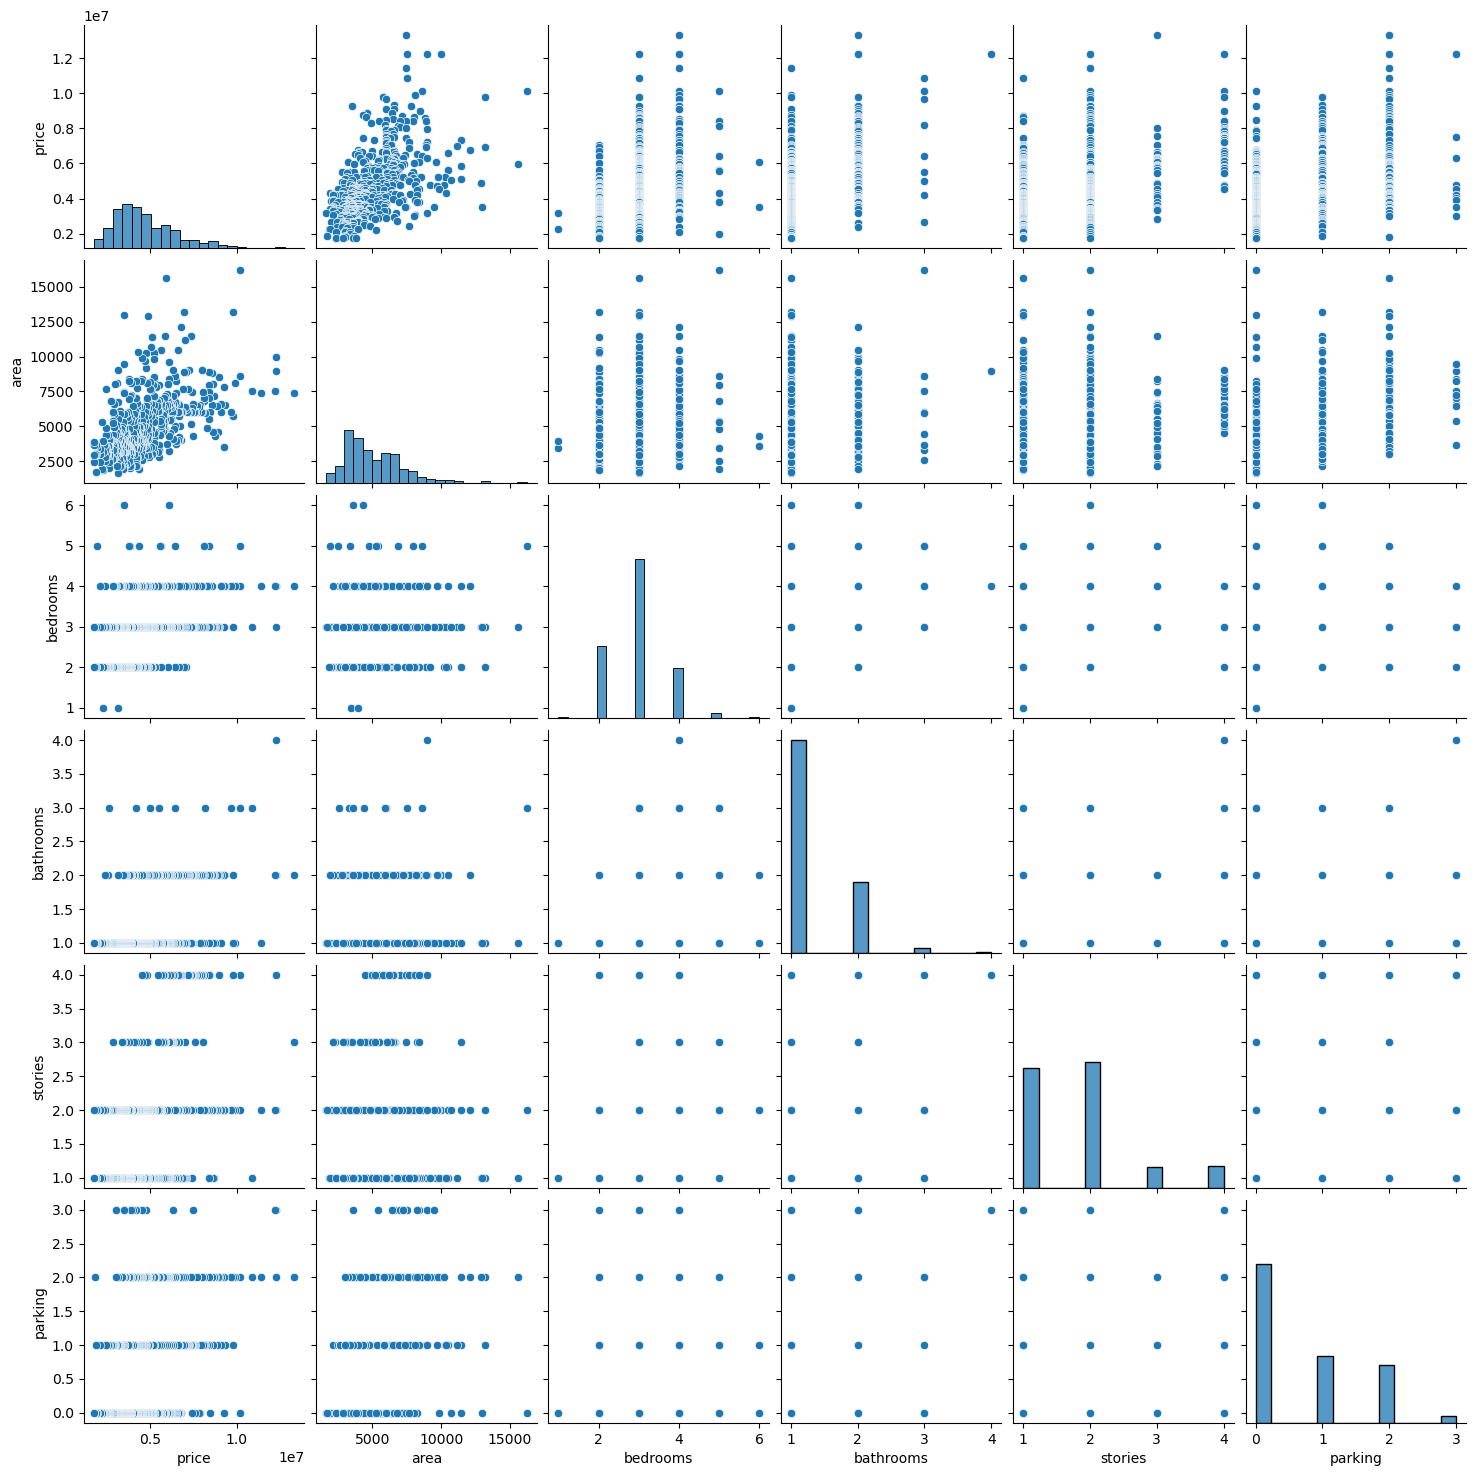

In [6]:
# Visualising Numeric Variables
sns.pairplot(housing)
plt.show()

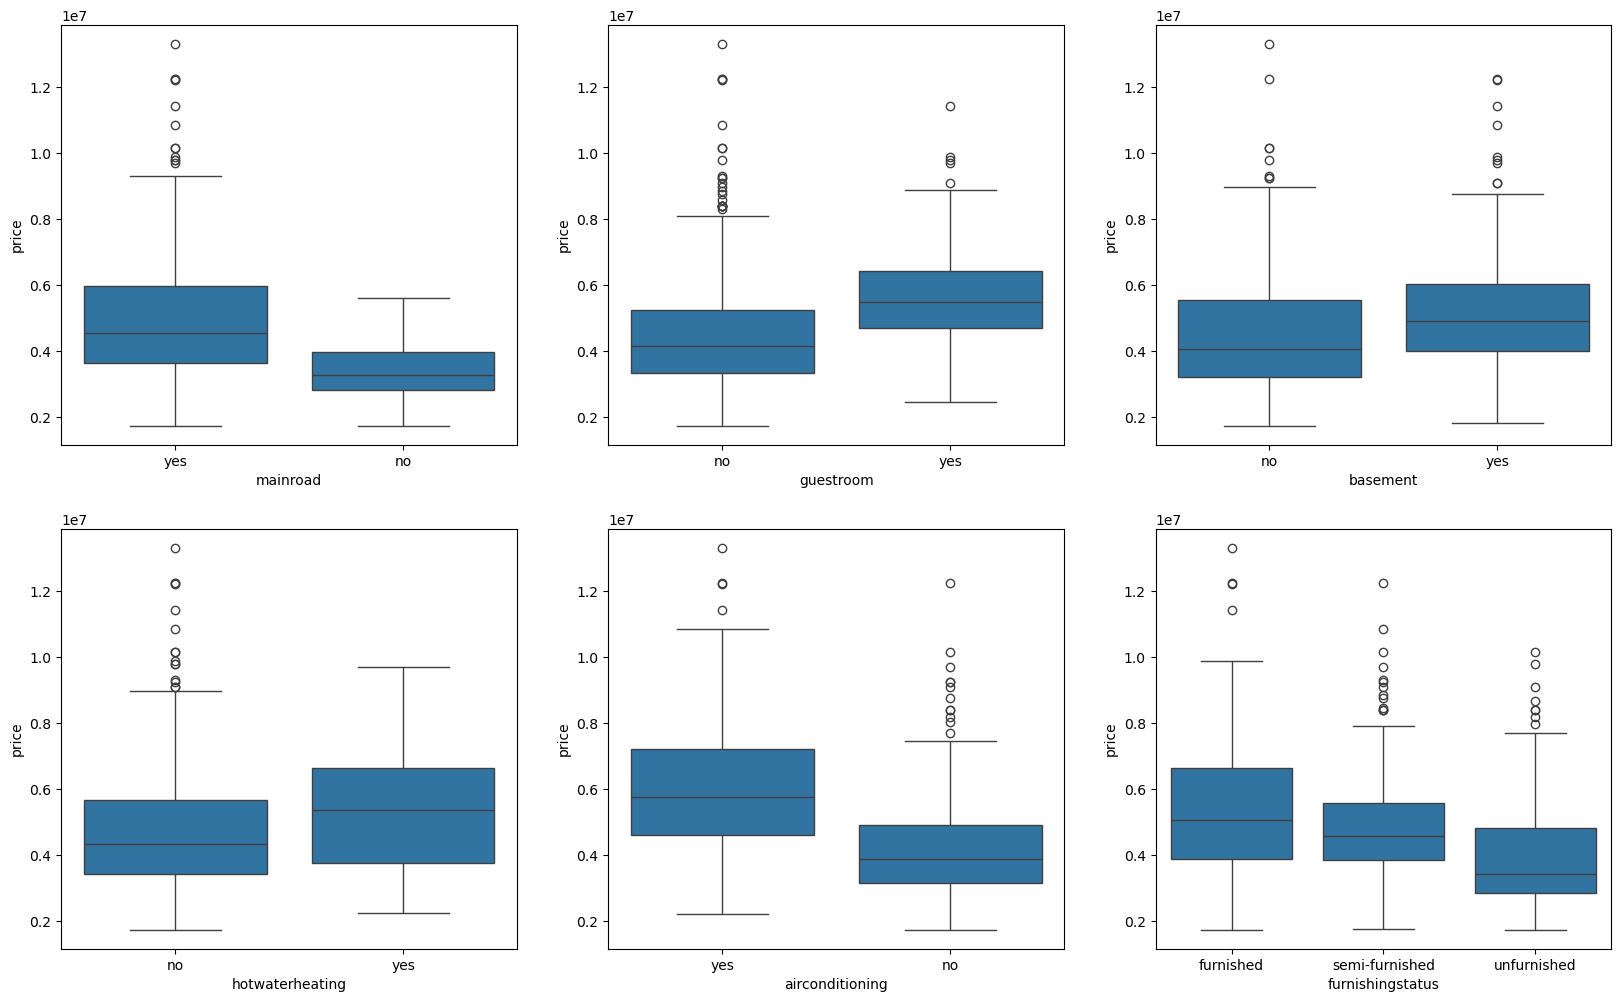

In [7]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

#### Step 3: Data Preparation

In [8]:
# converting yes to 1 and no to 0
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)

In [9]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


##### Dummy Variables creation

In [10]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
housing = pd.concat([housing, status], axis = 1)

In [12]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


##### Step 4: Splitting the Data into Training and Testing Sets

In [38]:

df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#Scaling data using minmax scaler
scaler = MinMaxScaler()

In [40]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [41]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,False,False
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,False,False
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,False,True


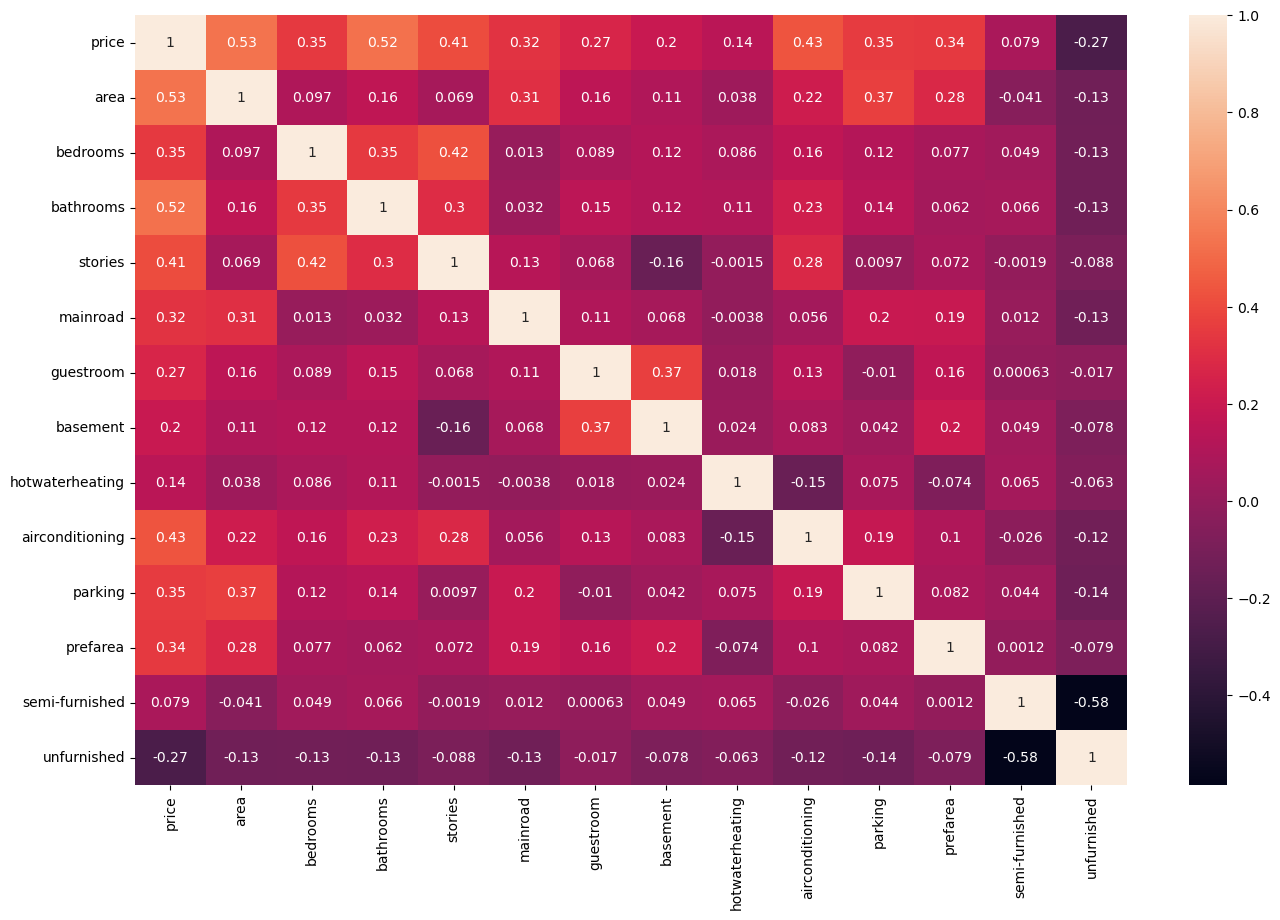

In [42]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [ ]:
# Dividing into X and Y train sets
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
# Dividing into X and Y test sets
y_test = df_test.pop('price')
X_test = df_test

##### Using Random Forest Regressor

In [45]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [46]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [29]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'StringIO' is not defined

In [48]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [49]:
r2_score(y_train, y_train_pred)

0.6781302045288894

In [50]:
r2_score(y_test, y_test_pred)

0.4896086433838682

##### Check feature importance

In [51]:
rf.feature_importances_

array([0.52087594, 0.01381103, 0.26738773, 0.01914681, 0.00587498,
       0.00817021, 0.02371991, 0.        , 0.04360154, 0.03228028,
       0.02345068, 0.00412213, 0.03755875])

In [52]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [53]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,area,0.520876
2,bathrooms,0.267388
8,airconditioning,0.043602
12,unfurnished,0.037559
9,parking,0.032280
6,basement,0.023720
10,prefarea,0.023451
3,stories,0.019147
1,bedrooms,0.013811
5,guestroom,0.008170
